<a href="https://colab.research.google.com/github/musawenkosikhulu/Aesthetics-and-visualizations/blob/main/AIMS_DS_2022_RT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monday 3rd Jan 2022

Regression tree practical

On the left, click on the folder icon and upload the boston.csv file.

## Task

Create a regression tree using the boston.csv data. Upload the data. Fill in the blanks accordingly.

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## Read in the data

In [62]:
# load dataset

df = pd.read_csv("boston.csv") # to do

In [63]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,507,507,507,507,507,507,507,507,507,507,507,507,507,507
unique,505,27,77,3,82,447,357,413,10,67,47,358,456,230
top,14.3337,0,18.1,0,0.538,6.167,100,3.4952,24,666,20.2,396.9,14.1,50
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Print the number of rows in the dataset.
Expected value is 506

In [20]:
#to do
len(df)

507

## Create X and y variables (features and target)

In [65]:
feature_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df[feature_cols] # Features
y = df.medv

## Split data into training and testing

In [66]:
# Set 30% of the data for testing
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=1) #to do

## Whenever you do some data manipulation, you should always check the resulting data

Get the shape of the training features.
Expected value is (354, 13)

In [67]:
X_train.shape#to do

(354, 13)

Get the shape of the training targets.
Expected value is (354,)

In [68]:
y_train.shape #to do

(354,)

Get the shape of the testing features.
Expected value is (152, 13)

In [69]:
X_test.shape #to do

(152, 13)

Get the shape of the testing targets.
Expected value is (152,)

In [70]:
y_test.shape #to do

(152,)

## Use scikit-learn to create the regression tree classifier.

API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [73]:
# Create regression tree classifier using the mean squared error criterion 
# and set a maximum depth of 3
reg_tree = DecisionTreeRegressor(criterion="squared_error",max_depth = 3,random_state=1)#to do

# Train Decision Tree Classifer on the training data
reg_tree = reg_tree.fit(X_train,y_train)

#Predict the targets for test dataset
y_pred = reg_tree.predict(X_test)#to do

## Evaluate on testing data

In [77]:
# Compare the model predictions to the true values on the test data
# use the mean squared error metric from scikit learn which you will have to import too!
from sklearn.metrics import mean_squared_error

print("mean squared error metric:",mean_squared_error(y_test, y_pred)) #to do

mean squared error metric: 27.86737967241263


## Visualise the decision tree

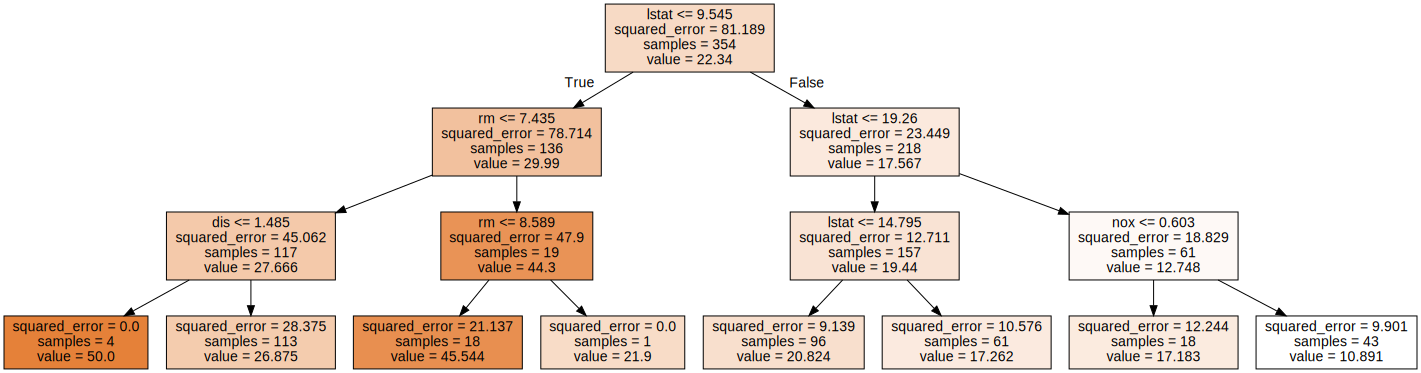

In [78]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Task

Print out the regression tree in text form. See this tutorial https://mljar.com/blog/visualize-decision-tree/ and scroll down to where it says "Visualizing the Decision Tree in Regression Task". The first example shows you how to print the tree in text form

In [79]:
text_representation = tree.export_text(reg_tree)
print(text_representation) #to do

|--- feature_12 <= 9.55
|   |--- feature_5 <= 7.43
|   |   |--- feature_7 <= 1.48
|   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.48
|   |   |   |--- value: [26.88]
|   |--- feature_5 >  7.43
|   |   |--- feature_5 <= 8.59
|   |   |   |--- value: [45.54]
|   |   |--- feature_5 >  8.59
|   |   |   |--- value: [21.90]
|--- feature_12 >  9.55
|   |--- feature_12 <= 19.26
|   |   |--- feature_12 <= 14.80
|   |   |   |--- value: [20.82]
|   |   |--- feature_12 >  14.80
|   |   |   |--- value: [17.26]
|   |--- feature_12 >  19.26
|   |   |--- feature_4 <= 0.60
|   |   |   |--- value: [17.18]
|   |   |--- feature_4 >  0.60
|   |   |   |--- value: [10.89]

